FEUILLE DE TP 5

---
# Polynôme interpolateur de Lagrange (Partie 2)
---

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np                       # pour les numpy array
import matplotlib.pyplot as plt          # librairie graphique

Nous rappelons le résultat d'existence et d'unicité vu en cours

> **(Polynôme interpolateur de Lagrange)**<br>
> Etant donnés $N$ un entier strictement positif, $x_1,\ldots,x_N$ des réels deux à deux distincts et $y_1,\ldots,y_N$ des réels, il existe un unique polynôme $P$ qui vérifie
> $$ P\in\mathbb{R}_{N-1}[X], \qquad P(x_i)=y_i, \quad 1\leq i\leq N.$$

## Construction en utilisant la base duale des polynômes de Lagrange

Nous rappelons que les polynômes de Lagrange associés aux points $x_1,\ldots,x_N$ sont définis par
$$
L_i = \prod_{j\neq i} \frac{X-x_j}{x_i-x_j}, \qquad 1\leq i\leq N.
$$
Le polynôme interpolateur de Lagrange s'exprime alors dans la base des polynômes de Lagrange 
$$
P = \sum_{i=1}^N y_i L_i.
$$

**Question**

> Proposez une fonction `interp_Lagrange` qui
> * prend en argument deux `ndarray` `x` et `y` de taille `N` et un `ndarray` `xx` de taille `M` ;
> * retourne l'évaluation du polynôme interpolateur aux points du vecteur `xx` en utilisant la décomposition dans la base des polynômes de Lagrange.
> Testez votre nouvelle fonction en reprenant le test fait avec la méthode de Vandermonde.

In [126]:
def Li (i,x,xx):
    """
    foction qui retourne le polynome de Lagrange aux points du vect x1,...,xn
    
    Parameters
    ----------
    i = entier
    
    x = vecteur
    
    xx = vecteur
    
    r Return
    ------
    
    xx  = évaluation du polynôme de Lagrange (si possible) 
    """
    Li = np.ones(xx.size)
    for j in range(x.size):
        if j != i :
            Li *= (xx - x[j]) / (x[i] - x[j])
    return Li



def interp_Lagrange(x,y,xx):
    """
    foction qui retourne une évaluation du polynome interpolateur aux points du vect xx
    
    Parameters
    ----------
    
    x = ndarray de taille N
    
    y = ndarray de taille N
    
    xx = ndarray de taille M
    
    r Return
    ------
    
    xx  = polynôme interpolateur de Lagrange 
    """
    P = 0.
    if x.size != y.size:
        raise ValueError('x et y n\'ont pas la même taille')
    for i in range(x.size):
        li = Li(i,x,xx)
        P += y[i] * li
    return P
    

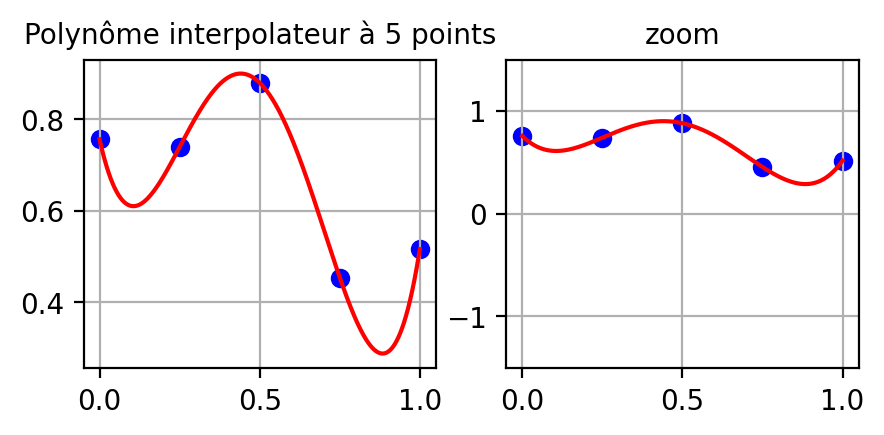

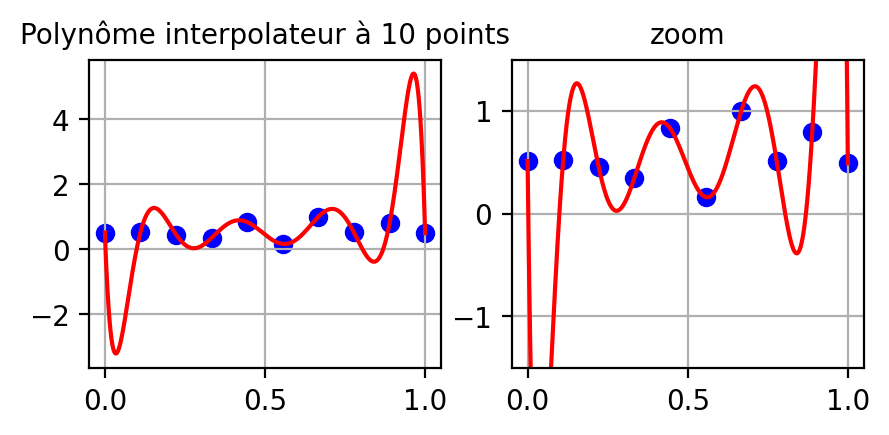

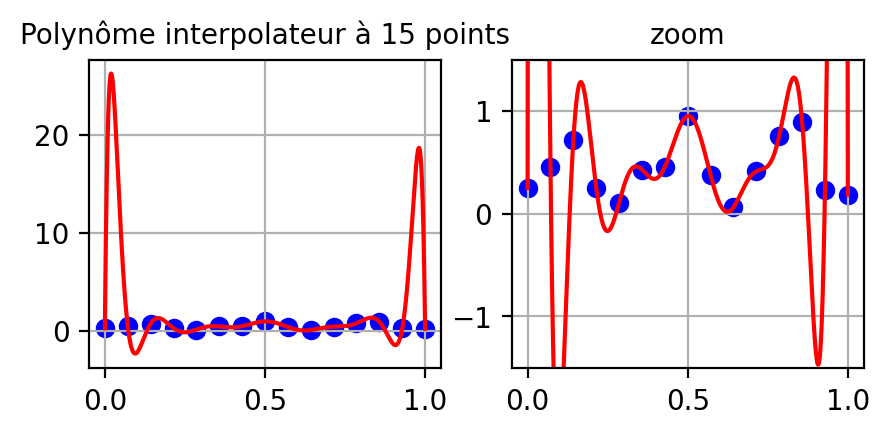

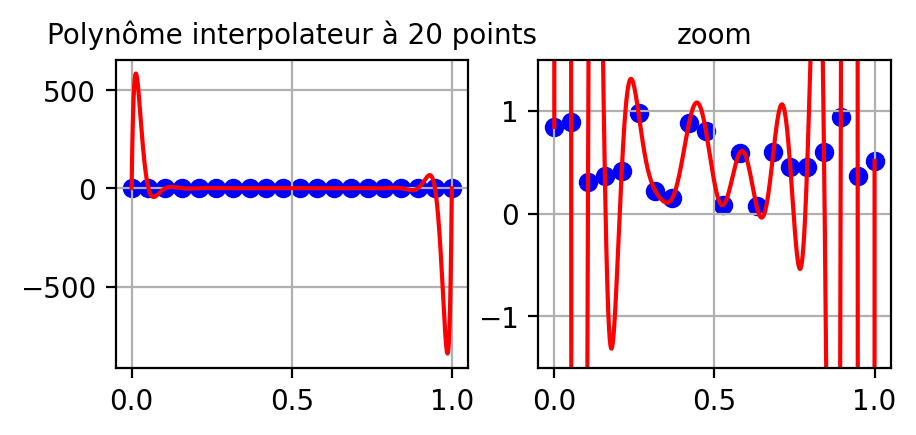

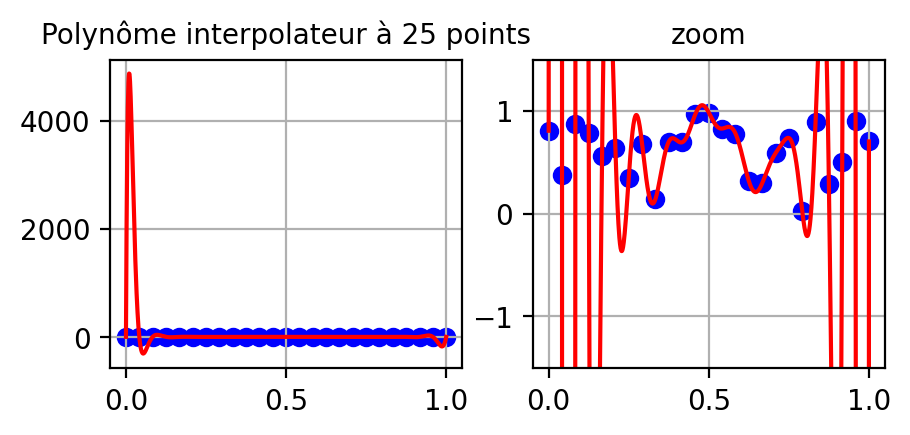

In [127]:
#test

for N in range(5, 30, 5):
    x = np.linspace(0, 1, N)
    y = np.random.rand(N)
    xx = np.linspace(0, 1,1025)
    yy = interp_Lagrange(x, y, xx)

    fig = plt.figure(figsize=(5, 2))
    ax = fig.add_subplot(1, 2, 1)
    ax.grid(True)
    ax.scatter(x, y, color='b')
    ax.plot(xx, yy, color='r')
    ax.set_title(f"Polynôme interpolateur à {N} points", fontsize=10)
    
    ax = fig.add_subplot(1, 2, 2)
    ax.scatter(x, y, color='b')
    ax.grid(True)
    ax.plot(xx, yy, color='r')
    ax.set_ylim(-1.5, 1.5)
    ax.set_title("zoom", fontsize=10)

## Le choix des points d'interpolation

Etant donné un intervalle $[a, b]$, nous rappelons la définition des familles de points classiques pour l'interpolation :
* les points équi-répartis
$$ x_{i, N} = a + (b-a) \frac{i-1}{N-1}, \qquad 1\leq i\leq N,$$
* les points de Tchebychev
$$ x_{i, N} = \frac{a+b}{2} + \frac{b-a}{2} \cos \Bigl( \frac{2i-1}{2N}\pi \Bigr), \qquad 1\leq i\leq N,$$

**Question 1**

> 1. Proposez une fonction `equirepartis(a, b, N)` qui prend en arguments 2 réels, les valeurs des bornes de l'intervalle $a$ et $b$ et 1 entier $N$ et qui retourne la famille des $N$ points équi-répartis entre $a$ et $b$.
> 2. Proposez une fonction `tchebychev(a, b, N)` qui prend en arguments 2 réels, les valeurs des bornes de l'intervalle $a$ et $b$ et 1 entier $N$ et qui retourne la famille des $N$ points de Tchebychev entre $a$ et $b$. 

In [183]:
def equirepartis(a,b,N):
    i = np.arange(1,N+1)
    return a+(b-a)*((i-1)/(N-1))

def tchebychev(a, b, N):
    i = np.arange(1,N+1)
    return (a+b)/2 + ((b-a)/2)*np.cos(((2*i - 1)/(2*N))*np.pi)

**Question 2**

> 1. Proposez une fonction `Li(i, x, xx)` qui prend en arguments un entier $i$ et deux vecteurs $x$ et $xx$ et qui retourne (si c'est possible) l'évaluation du polynôme $L_i$ aux points $xx$ avec pour rappel
$$ L_i(X) = \prod_{j\neq i} \frac{X-x_j}{x_i-x_j}.$$
> 2. Tracez dans des fenêtres graphiques séparés l'allure des différents polynômes pour les points équi-répartis et les points de Tchebychev (pour différentes valeurs de $N$). Vous pouvez essayer d'obtenir une figure ressemblant à celle-ci.
> 3. Que remarquez-vous ?

![polynomesLi](TP05_Li.png)

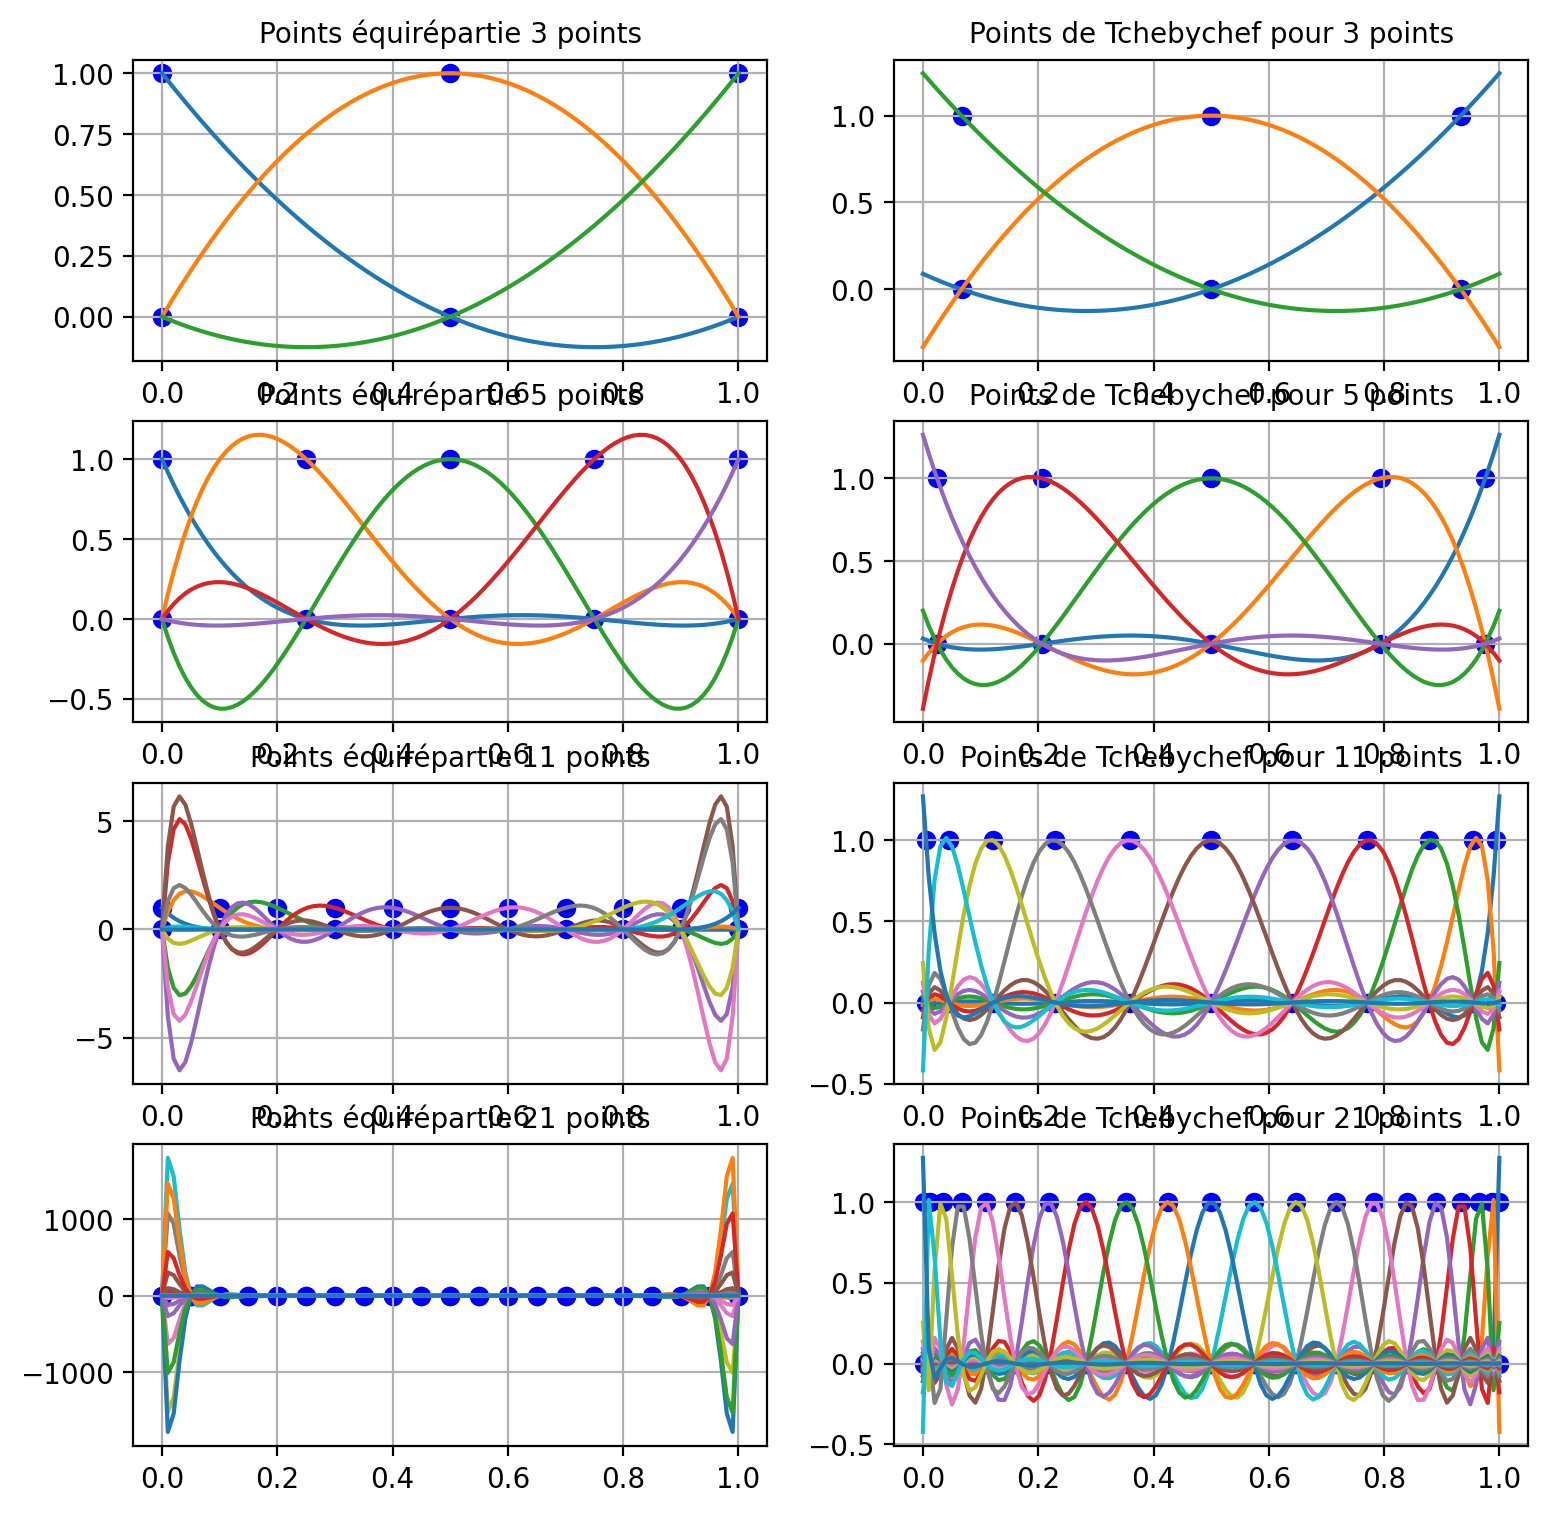

In [209]:
list_N = [3,5,11,21]
xx = np.linspace(0,1,100)

fig = plt.figure(figsize = (9,9))
for k,N in enumerate(list_N):
    ax_equ = fig.add_subplot( len(list_N), 2, 2*k+1)
    ax_equ.grid(True)
    ax_equ.set_title(f"Points équirépartie {N} points", fontsize=10)
    ax_tch = fig.add_subplot(len(list_N), 2, 2*k+2)
    ax_tch.grid(True) 

    ax_tch.set_title(f"Points de Tchebychef pour {N} points", fontsize=10)

    equ = equirepartis(0,1,N)
    tch = tchebychev(0,1,N)
    
    ax_equ.scatter(equ,0*equ, color='b')
    ax_equ.scatter(equ,0*equ+1, color='b')
    ax_tch.scatter(tch,0*tch, color='b')
    ax_tch.scatter(tch,0*tch+1, color='b')

    
    for i in range(N):
        ax_equ.plot(xx,Li(i,equ,xx))
        ax_tch.plot(xx,Li(i,tch,xx))
        


**Question 3**

Afin de visualiser la convergence ou la non convergence du polynôme interpolateur vers une fonction régulière, nous choisissons de prendre la fonction $f$ définie sur $[-5, 5]$ par
$$f(x) = \frac{1}{1+x^2}.$$

> 1. Tracez dans une même fenêtre graphique
>    - la fonction $f$
>    - les polynômes interpolateurs de Lagrange pour $N$ points équi-répartis avec $N\in\lbrace 5, 10, 20 \rbrace$. Ajoutez un titre et une légende.
> 2. Recommencez la question précédente avec des points de Tchebychev.
> 3. Que remarquez-vous ?

In [222]:
def f(x):
    return 1/(1+x**2)

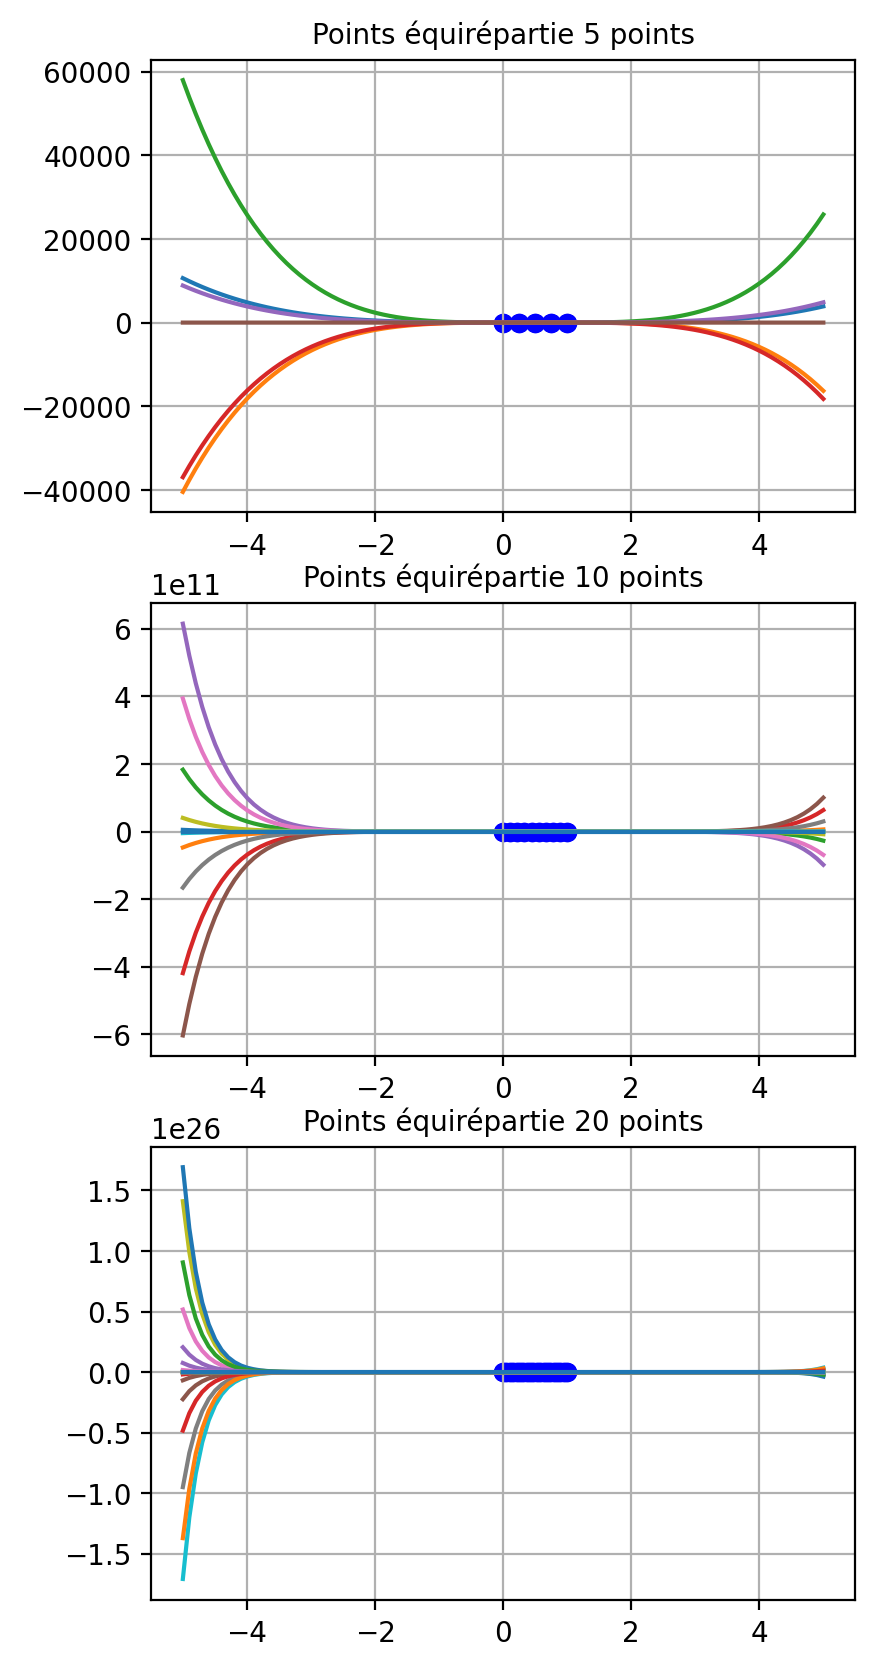

In [224]:
list_N = [5,10,20]
xx = np.linspace(-5,5,100)
x = np.linspace(-5,5,100)

fig = plt.figure(figsize = (10,10))

for k,N in enumerate(list_N):
    ax = fig.add_subplot(len(list_N), 2, 2*k+1)
    ax.grid(True)
    ax.set_title(f"Points équirépartie {N} points", fontsize=10)

    equ = equirepartis(0,1,N)
    
    ax.scatter(equ,0*equ, color='b')
    ax.scatter(equ,0*equ+1, color='b')

    for i in range(N):
        ax.plot(xx,Li(i,equ,xx))
    
    ax.plot(x,f(x))


**Question 4**

Pour mesurer l'écart entre la fonction $f$ et un polynôme interpolateur $P$, nous choisissons la norme infinie.

> 1. Tracez dans une fenêtre graphique la norme infinie de la différence entre la fonction et son polynôme interpolateur à $N$ points équi-répartis en fonction de $N$. Vous prendrez $N$ entre $5$ et $100$ par pas de $5$ et vous choisirez une échelle logarithmique pour les ordonnées.
> 2. Ajoutez sur la même figure la courbe obtenue pour les points de Techbychev.
> 3. Que remarquez-vous ?